# <center>2v2 'Men's Net' 'Flight Path' League Analysis for the 2018 Season</center>
## <center>by Jason Leduc and Brian Hammer</center>

# I. The Scoring System

In this notebook, I am attempting to recreate my volleyball league scoring spreadsheet using Python and the pandas package.  We have been running this league for three years now, so we have 3 seasons of data: 2016, 2017, and 2018.  Here I will work with data from 2018.  The original spreadsheet is here: https://docs.google.com/spreadsheets/d/1Rmo0pIkvgpZ_oLMLvJklT0JSh8bdgfC0M709-y5EJ_8/edit?usp=sharing

In [1]:
import pandas as pd

In [24]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
vb_2018 = pd.read_csv('../data/vb_2018.csv', sep = ';')
# must save the csv as a csv using the drop-down filetype menu in OpenOffice Calc

In [4]:
vb_2018.head()

,Date,Winner,Winner.1,margin,Loser,Loser.1,court
0,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
1,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0


In [5]:
vb_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 7 columns):
Date        378 non-null object
Winner      223 non-null object
Winner.1    223 non-null object
margin      223 non-null float64
Loser       223 non-null object
Loser.1     223 non-null object
court       536 non-null float64
dtypes: float64(2), object(5)
memory usage: 29.4+ KB


First I want to change the names of the columns

In [6]:
vb_2018.rename(columns={'Winner': 'Winner1', 'Winner.1': 'Winner2', 'Loser':'Loser1', 
                                 'Loser.1': 'Loser2'}, inplace=True)

In [7]:
vb_2018.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
0,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
1,05/02/18,NaN,NaN,NaN,NaN,NaN,1.0
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0


Removing rows with NaN in "Winner1" column, and saving results with new df name

In [8]:
vb18 = vb_2018[vb_2018.Winner1.notnull()].copy(deep=True)
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
2,05/02/18,Kevin,Peter,13.0,Hammer,Jason,1.0
3,05/02/18,Brent,Jeremy,6.0,Kevin,Peter,1.0
4,05/02/18,Brent,Jeremy,6.0,Andy,Juan,1.0
19,05/09/18,Andy,Casey,11.0,Jason,Peter,1.0
20,05/09/18,Jeremy,Nick,5.0,Andy,Casey,1.0


Changing datatypes of margin and court to int

In [9]:
vb18['margin'] = vb18['margin'].astype(int)
vb18['court'] = vb18['court'].astype(int)
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court
2,05/02/18,Kevin,Peter,13,Hammer,Jason,1
3,05/02/18,Brent,Jeremy,6,Kevin,Peter,1
4,05/02/18,Brent,Jeremy,6,Andy,Juan,1
19,05/09/18,Andy,Casey,11,Jason,Peter,1
20,05/09/18,Jeremy,Nick,5,Andy,Casey,1


I think I want a list of all the players, so I can give them scores

In [10]:
player_list = sorted(pd.unique(vb18[['Winner1', 'Winner2', 'Loser1', 'Loser2']].values.ravel('K')))
player_list

['Abrah',
 'Andy',
 'BA',
 'Brent',
 'Casey',
 'Eric',
 'Hammer',
 'Jason',
 'Jeremy',
 'Jerry',
 'Juan',
 'Kevin',
 'Martin',
 'Nick',
 'Peter',
 'Scott']

In the spreadsheet form of this, I had a grid with all the names across both the rows and columns to record the point totals for each possible pair of teammates

In [11]:
court1_grid = pd.DataFrame(index=player_list, columns=player_list)
court1_grid

,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jason,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeremy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jerry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I only need to fill in half of the grid, which I did in a sloppy manual way in the spreadsheet.  In each row of the data, the winners and losers are listed alphabetically, so I can use this to require that row names are alphabetically prior to column names

The grid may not be necessary in the short term for calculations, although it is still likely a useful visualization.  For later analysis of relative team strengths, I will need to treat each combination of teammates as an object, specifically a node in a graph, so I may as well establish that data structure now for scoring.  First I'll make a list of the possible teammate combinations

In [12]:
all_team_combos = list()
for name in player_list:
    for name2 in player_list:
        new_team = sorted([name, name2])
        if new_team[0] == new_team[1]: # can't have a team with two of the same player
            continue
        if new_team in all_team_combos: # don't want repeated team combos
            continue
        else:
            all_team_combos.append(new_team)
print(all_team_combos)

[['Abrah', 'Andy'], ['Abrah', 'BA'], ['Abrah', 'Brent'], ['Abrah', 'Casey'], ['Abrah', 'Eric'], ['Abrah', 'Hammer'], ['Abrah', 'Jason'], ['Abrah', 'Jeremy'], ['Abrah', 'Jerry'], ['Abrah', 'Juan'], ['Abrah', 'Kevin'], ['Abrah', 'Martin'], ['Abrah', 'Nick'], ['Abrah', 'Peter'], ['Abrah', 'Scott'], ['Andy', 'BA'], ['Andy', 'Brent'], ['Andy', 'Casey'], ['Andy', 'Eric'], ['Andy', 'Hammer'], ['Andy', 'Jason'], ['Andy', 'Jeremy'], ['Andy', 'Jerry'], ['Andy', 'Juan'], ['Andy', 'Kevin'], ['Andy', 'Martin'], ['Andy', 'Nick'], ['Andy', 'Peter'], ['Andy', 'Scott'], ['BA', 'Brent'], ['BA', 'Casey'], ['BA', 'Eric'], ['BA', 'Hammer'], ['BA', 'Jason'], ['BA', 'Jeremy'], ['BA', 'Jerry'], ['BA', 'Juan'], ['BA', 'Kevin'], ['BA', 'Martin'], ['BA', 'Nick'], ['BA', 'Peter'], ['BA', 'Scott'], ['Brent', 'Casey'], ['Brent', 'Eric'], ['Brent', 'Hammer'], ['Brent', 'Jason'], ['Brent', 'Jeremy'], ['Brent', 'Jerry'], ['Brent', 'Juan'], ['Brent', 'Kevin'], ['Brent', 'Martin'], ['Brent', 'Nick'], ['Brent', 'Peter'],

I want to make a dictionary of all these teams, using a "Name1/Name2" string as the key, and a dictionary of information as the value.  This would include the 2-item list of players, the court1 and court 2 point totals, and a list of games played by that team.  For deeper analysis, we will also likely extract a total spread vs each other team, with a positive spread resulting in a directed edge from the other team, and a negative spread resulting in a directed edge toward the other team

The scoring system involves giving 8 points for a court 1 win with a new partner, 4 more points for a 2nd win with that partner, 2 more for a 3rd win, and one point for every win after that with the same partner.  In addition, one point is awarded for each win on court 2.  To implement the scoring system here, I'll count the court 1 wins of each team and use that number as an index into the scoring_system list.

In [13]:
team_dict = dict() # store data for each possible team
individual_scores = dict() # keep track of individual scores
team_names = [] # I need this list later in part II (Team Power Rankings) to build a player stats dictionary
for player in player_list:
    individual_scores[player] = 0
scoring_system = [0, 8, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
for team in all_team_combos:
    court1_wins = 0
    court2_wins = 0
    team_name = str(team[0] + "/" + team[1])
    team_names.append(team_name)
    # get a list of games, with each game a dictionary automatically generated from the row data in the for statement
    # need to iterate through the dataframe of games
    game_list = list()
    for index, row in vb18.iterrows():
        if list([row['Winner1'], row['Winner2']]) == team:
            game_list.append(row)
            if(row['court'] == 1):
                court1_wins += 1
            else:
                court2_wins += 1
    court1_points = scoring_system[court1_wins]
    individual_scores[team[0]] += court1_points + court2_wins
    individual_scores[team[1]] += court1_points + court2_wins
    team_dict[team_name] = [team, court1_points, court2_wins, game_list]
    court1_grid[team[0]][team[1]] = court1_points
print("Individual scores: " + str(individual_scores))

Individual scores: {'Abrah': 21, 'Andy': 103, 'BA': 111, 'Brent': 32, 'Casey': 125, 'Eric': 10, 'Hammer': 75, 'Jason': 74, 'Jeremy': 185, 'Jerry': 78, 'Juan': 81, 'Kevin': 156, 'Martin': 89, 'Nick': 64, 'Peter': 58, 'Scott': 38}


In [14]:
team_dict

{'Abrah/Andy': [['Abrah', 'Andy'], 0, 0, []],
 'Abrah/BA': [['Abrah', 'BA'], 0, 1, [Date       07/25/18
   Winner1       Abrah
   Winner2          BA
   margin            2
   Loser1       Hammer
   Loser2        Peter
   court             2
   Name: 476, dtype: object]],
 'Abrah/Brent': [['Abrah', 'Brent'], 0, 1, [Date       06/13/18
   Winner1       Abrah
   Winner2       Brent
   margin            6
   Loser1         Andy
   Loser2        Jerry
   court             2
   Name: 378, dtype: object]],
 'Abrah/Casey': [['Abrah', 'Casey'], 0, 1, [Date       06/20/18
   Winner1       Abrah
   Winner2       Casey
   margin            4
   Loser1         Juan
   Loser2        Scott
   court             2
   Name: 390, dtype: object]],
 'Abrah/Eric': [['Abrah', 'Eric'], 0, 0, []],
 'Abrah/Hammer': [['Abrah', 'Hammer'], 0, 0, []],
 'Abrah/Jason': [['Abrah', 'Jason'], 0, 0, []],
 'Abrah/Jeremy': [['Abrah', 'Jeremy'], 14, 2, [Date       06/27/18
   Winner1       Abrah
   Winner2      Jeremy
   m

In [15]:
court1_grid

,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andy,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casey,0,14,12,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric,0,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer,0,12,8,0,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jason,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeremy,14,14,14,12,14,0,14,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jerry,0,0,8,0,0,0,0,8,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# II. Team Power Rankings 

In the Google Sheets implementation of the league, I did an analysis of team strengths in August 2018.  I started by calculating an average point spread per game for each player to establish a player strength statistic. These were used to establish a sort of prior belief about the strength of each team.  Then point spread data were collected from actual matchups, and an adjustment was made to the team strength measure based on the difference in the actual outcomes vs. the predicted outcomes. These differences were added to the prior belief to establish a Power Rating for each team.  The data were presented in a grid much like the one above, so that playoff captains would have some guidance on choosing their partners.  I will recreate that analysis here before moving on to other methods such as Hammer's idea for a graph theoretic approach to the problem.

First I'll build a dictionary of player stats to store my new average spread statistic, in addition to point totals, and average points.  To get these averages, I'll need a count of games played

In [16]:
player_stats = dict()
for player in player_list:
    player_stats[player] = dict()
print(player_stats)

{'Abrah': {}, 'Andy': {}, 'BA': {}, 'Brent': {}, 'Casey': {}, 'Eric': {}, 'Hammer': {}, 'Jason': {}, 'Jeremy': {}, 'Jerry': {}, 'Juan': {}, 'Kevin': {}, 'Martin': {}, 'Nick': {}, 'Peter': {}, 'Scott': {}}


In [17]:
for player in individual_scores:
    player_stats[player]['total_points'] = individual_scores[player]
    player_stats[player]['games_played'] = 0   #initializing, will count below]
    player_stats[player]['spread'] = 0
print(player_stats)

{'Abrah': {'total_points': 21, 'games_played': 0, 'spread': 0}, 'Andy': {'total_points': 103, 'games_played': 0, 'spread': 0}, 'BA': {'total_points': 111, 'games_played': 0, 'spread': 0}, 'Brent': {'total_points': 32, 'games_played': 0, 'spread': 0}, 'Casey': {'total_points': 125, 'games_played': 0, 'spread': 0}, 'Eric': {'total_points': 10, 'games_played': 0, 'spread': 0}, 'Hammer': {'total_points': 75, 'games_played': 0, 'spread': 0}, 'Jason': {'total_points': 74, 'games_played': 0, 'spread': 0}, 'Jeremy': {'total_points': 185, 'games_played': 0, 'spread': 0}, 'Jerry': {'total_points': 78, 'games_played': 0, 'spread': 0}, 'Juan': {'total_points': 81, 'games_played': 0, 'spread': 0}, 'Kevin': {'total_points': 156, 'games_played': 0, 'spread': 0}, 'Martin': {'total_points': 89, 'games_played': 0, 'spread': 0}, 'Nick': {'total_points': 64, 'games_played': 0, 'spread': 0}, 'Peter': {'total_points': 58, 'games_played': 0, 'spread': 0}, 'Scott': {'total_points': 38, 'games_played': 0, 'spr

Going to try counting games directly from the vb18 dataframe while computing cumulative spreads

In [18]:
# print(team_names)
for index, row in vb18.iterrows():
    player_stats[row['Winner1']]['games_played'] += 1
    player_stats[row['Winner2']]['games_played'] += 1
    player_stats[row['Loser1']]['games_played'] += 1
    player_stats[row['Loser2']]['games_played'] += 1
    player_stats[row['Winner1']]['spread'] += row['margin']
    player_stats[row['Winner2']]['spread'] += row['margin']
    player_stats[row['Loser1']]['spread'] -= row['margin']
    player_stats[row['Loser2']]['spread'] -= row['margin']
print(player_stats)

{'Abrah': {'total_points': 21, 'games_played': 52, 'spread': -205}, 'Andy': {'total_points': 103, 'games_played': 64, 'spread': 105}, 'BA': {'total_points': 111, 'games_played': 58, 'spread': 14}, 'Brent': {'total_points': 32, 'games_played': 43, 'spread': -89}, 'Casey': {'total_points': 125, 'games_played': 59, 'spread': 112}, 'Eric': {'total_points': 10, 'games_played': 8, 'spread': 1}, 'Hammer': {'total_points': 75, 'games_played': 64, 'spread': -83}, 'Jason': {'total_points': 74, 'games_played': 71, 'spread': -55}, 'Jeremy': {'total_points': 185, 'games_played': 61, 'spread': 223}, 'Jerry': {'total_points': 78, 'games_played': 60, 'spread': 43}, 'Juan': {'total_points': 81, 'games_played': 44, 'spread': 60}, 'Kevin': {'total_points': 156, 'games_played': 56, 'spread': 157}, 'Martin': {'total_points': 89, 'games_played': 69, 'spread': -31}, 'Nick': {'total_points': 64, 'games_played': 50, 'spread': -36}, 'Peter': {'total_points': 58, 'games_played': 72, 'spread': -96}, 'Scott': {'to

Let's compute the average spread, which will be used to compute prior expectations for the outcomes of games

In [19]:
for player in player_stats:
    player_stats[player]['average_spread'] = player_stats[player]['spread'] / player_stats[player]['games_played']
player_stats

{'Abrah': {'average_spread': -3.9423076923076925,
  'games_played': 52,
  'spread': -205,
  'total_points': 21},
 'Andy': {'average_spread': 1.640625,
  'games_played': 64,
  'spread': 105,
  'total_points': 103},
 'BA': {'average_spread': 0.2413793103448276,
  'games_played': 58,
  'spread': 14,
  'total_points': 111},
 'Brent': {'average_spread': -2.0697674418604652,
  'games_played': 43,
  'spread': -89,
  'total_points': 32},
 'Casey': {'average_spread': 1.8983050847457628,
  'games_played': 59,
  'spread': 112,
  'total_points': 125},
 'Eric': {'average_spread': 0.125,
  'games_played': 8,
  'spread': 1,
  'total_points': 10},
 'Hammer': {'average_spread': -1.296875,
  'games_played': 64,
  'spread': -83,
  'total_points': 75},
 'Jason': {'average_spread': -0.7746478873239436,
  'games_played': 71,
  'spread': -55,
  'total_points': 74},
 'Jeremy': {'average_spread': 3.6557377049180326,
  'games_played': 61,
  'spread': 223,
  'total_points': 185},
 'Jerry': {'average_spread': 0.7

Now let's use these average spreads to predict the outcome of games that were already played.  We'll enter these predictions in a new column in the vb18 dataframe, and we'll subtract these predicted spreads from the actual margin of victory to calculate a deviation_from_prediction

In [20]:
predicted_spreads = []
for index, row in vb18.iterrows():
    predicted_spreads.append(player_stats[row['Winner1']]['average_spread'] +
                            player_stats[row['Winner2']]['average_spread'] -
                            player_stats[row['Loser1']]['average_spread'] -
                             player_stats[row['Loser2']]['average_spread'])
vb18['predicted_spreads'] = predicted_spreads
vb18['deviation_from_prediction'] = vb18['margin'] - vb18['predicted_spreads']
vb18.head()

,Date,Winner1,Winner2,margin,Loser1,Loser2,court,predicted_spreads,deviation_from_prediction
2,05/02/18,Kevin,Peter,13,Hammer,Jason,1,3.541761,9.458239
3,05/02/18,Brent,Jeremy,6,Kevin,Peter,1,0.115732,5.884268
4,05/02/18,Brent,Jeremy,6,Andy,Juan,1,-1.418291,7.418291
19,05/09/18,Andy,Casey,11,Jason,Peter,1,5.646911,5.353089
20,05/09/18,Jeremy,Nick,5,Andy,Casey,1,-0.603192,5.603192


So which teams have the most synergy, i.e. the largest positive deviations from predictions?  Which teams are the strongest, as measured by their average deviation from predictions plus their individual average spreads?

I don't know the most efficient way to do this.  For now I'm going to update team_dict to store these new statistics.  I'll need to iterate through the vb18 dataframe to accumulate the deviations from expectation for each team.

In [21]:
team_synergy_grid = pd.DataFrame(index=player_list, columns=player_list)
pvp_dominance_grid = pd.DataFrame(index=player_list, columns=player_list)

for team_combo in all_team_combos:
    team_synergy = 0   # sum of deviation_from_prediction for matchups where the two players are on a team together
    pvp_dominance = 0   # sum of same deviations for matchups between the two players
    num_games_together = 0   # number of games played on the same team
    num_games_vs = 0   # number of games played against each other
    
    for index, row in vb18.iterrows():
        if (row['Winner1'] == team_combo[0]) & (row['Winner2'] == team_combo[1]):
            team_synergy += row['deviation_from_prediction']
            num_games_together += 1
        elif (row['Loser1'] == team_combo[0]) & (row['Loser2'] == team_combo[1]):
            team_synergy -= row['deviation_from_prediction']
            num_games_together += 1
        elif ((row['Winner1'] == team_combo[0]) | (row['Winner2'] == team_combo[0])) & ((row['Loser1'] == team_combo[1]) | (row['Loser2'] == team_combo[1])):
            pvp_dominance += row['deviation_from_prediction']
            num_games_vs += 1
        elif ((row['Winner1'] == team_combo[1]) | (row['Winner2'] == team_combo[1])) & ((row['Loser1'] == team_combo[0]) | (row['Loser2'] == team_combo[0])):
            pvp_dominance -= row['deviation_from_prediction']
            num_games_vs += 1
    if num_games_together > 0:
        team_synergy = team_synergy / num_games_together # convert to an average per game
    if num_games_vs > 0:
        pvp_dominance = pvp_dominance / num_games_vs # convert to an average per game
#     print(str(team_combo) + str(team_synergy) + " " + str(pvp_dominance))
#     print(team_synergy_grid)
#     print(team_synergy_grid.loc[team_combo[0], team_combo[1]])
    team_synergy_grid.at[team_combo[1], team_combo[0]] = "%.2f" % team_synergy
    pvp_dominance_grid.at[team_combo[1], team_combo[0]] = "%.2f" % (pvp_dominance*(-1))
    pvp_dominance_grid.at[team_combo[0], team_combo[1]] = "%.2f" % (pvp_dominance)
#     team_synergy_grid[team_combo[0]][team_combo[1]] = team_synergy
team_synergy_grid


,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andy,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BA,-1.84,7.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,3.05,-0.14,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Casey,2.80,0.85,4.73,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eric,0.63,0.51,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer,-0.21,4.56,-0.47,0.00,0.25,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jason,0.54,-1.08,2.57,-2.72,-6.30,0.00,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jeremy,0.61,-5.33,1.70,6.84,-1.23,0.00,1.13,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jerry,-1.51,-6.06,0.04,2.56,0.89,0.00,-0.58,0.83,-0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pvp_dominance_grid

,Abrah,Andy,BA,Brent,Casey,Eric,Hammer,Jason,Jeremy,Jerry,Juan,Kevin,Martin,Nick,Peter,Scott
Abrah,NaN,2.69,-1.52,-3.87,1.93,0.00,1.12,-2.31,3.85,0.53,0.61,1.78,-0.46,-1.77,-0.86,0.28
Andy,-2.69,NaN,-0.62,-1.34,-0.24,-1.62,0.52,1.44,-0.86,-1.34,1.03,0.52,1.71,-1.84,-1.23,-0.97
BA,1.52,0.62,NaN,-0.02,4.03,0.00,2.19,-1.54,1.29,1.57,0.33,-2.07,0.55,-0.97,0.04,2.81
Brent,3.87,1.34,0.02,NaN,-1.09,-4.97,-0.96,1.02,0.04,0.96,3.05,2.68,3.11,0.59,0.77,-0.66
Casey,-1.93,0.24,-4.03,1.09,NaN,-2.26,-0.28,0.27,0.18,0.08,-0.58,0.03,1.67,-1.59,1.62,-0.60
Eric,0.00,1.62,0.00,4.97,2.26,NaN,-0.33,3.16,0.00,0.00,-0.70,-0.00,0.00,12.12,4.15,0.00
Hammer,-1.12,-0.52,-2.19,0.96,0.28,0.33,NaN,0.12,3.03,1.75,1.36,-0.64,1.22,0.86,-0.86,-2.52
Jason,2.31,-1.44,1.54,-1.02,-0.27,-3.16,-0.12,NaN,0.53,3.22,0.60,3.08,0.25,3.55,-2.32,1.12
Jeremy,-3.85,0.86,-1.29,-0.04,-0.18,0.00,-3.03,-0.53,NaN,-1.21,2.71,3.76,1.99,-0.72,-0.37,0.34
Jerry,-0.53,1.34,-1.57,-0.96,-0.08,0.00,-1.75,-3.22,1.21,NaN,-1.07,-1.03,0.00,0.41,2.23,2.42


This last one is a little trickier to interpret. A positive number means the player whose name is on the left side is dominant to the player whose name is on top

I'd also like to do a statistical analysis of these data, preferably using an appropriate non-parametric test.

#### Parametric Solution?
One parametric idea is to use a "factorial method".  It would involve the "dependent variable" being the measured differences from expectations, and it would be "one-factor" in the sense that only the team composition changes between "treatments", i.e. pairs of players.  Multiple games by the same team would be "replicates", and I could run the test with different data cutoffs for number of replicates available since some teams don't have enough data to show statistical significance.  So we would do a "one-way ANOVA" (analysis of variance) in which we compare the difference of the treatments means from the overall mean to the variation around the treatment means between the replicates of each treatment to see if there is an overall difference between the player pairs in terms of synergy and/or pvp dominance.  Note that we have twice as many data points for pvp dominance vs synergy, since in any single game a player faces two opponents but only has one teammate.  This design is not "balanced" because we have unequal numbers of units assigned to each treatment, i.e. some pairs played together or against each other more often than other pairs.

There are some important assumptions made when using this technique: The treatment populations must be normal, and the treatment populations must have the same variance.
   
With our small sample number for pairs of players, these would both be hard to check.  But they might be measurable for the pooled data involving each individual player

#### Non-Parametric Solution?
Finding an appropriate nonparametric test for this stuff is more painful than I expected.  I'd rather not compute a statistic that I compare to a table or worry about which assumptions I'm making.  I'd rather directly calculate a probability of finding a set of ranks equal to or better than the ranks I see for a given team in the pool of ranks.  Is this computationally difficult at the scales I'm working at?  Or is it something better done with a simulation?  Probably the simulation idea is best.  I really like this idea.  We would need to generate an array of sums of random ranks for each number of ranks represented in the list of teams.  Then calculate the sum of the ranks for each team, and find the position of that sum in the sorted array of random rank sums for that n.  That position becomes the main statistic (let's call it "synergy significance") and should be comparable against teams that played different numbers of games.  A ranking of teammates by that statistic would tell each player who they synergize best with, but the conversion from numerical to rank data means we don't get a raw prediction of spread against an average team, which is what I calculated before.  Another way to look at it is as a measure of confidence in the use of the "deviation_from_prediction" number in a calculation of team power, but I have no idea how to be mathematically precise about such a thing.

I'm gonna the analytical way first, i.e. I'll make an array of all the possible rank sums for a given size pool.  I think we play ~240 games per season so let's use that size pool.  An average team plays together maybe 4 times, so that will be number of ranks summed.  So let's try making an array of the rank sum of every possible combination of ranks.  Ranks can't be repeated, so there is no correction needed for multiple ways of populating the ranks.

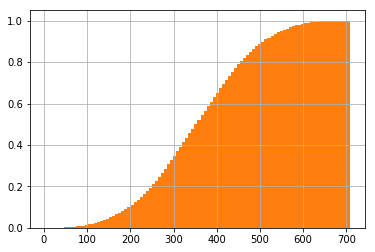

In [25]:
array_of_rank_sums = []
for i in range(240-4):
    for j in range(i+1,240-3):
        for k in range(j+1, 240-2):
            array_of_rank_sums.append(i+j+k)
#             for l in range(k, 240-1):
#                 array_of_rank_sums.append(i+j+k+l)
# print(sorted(array_of_rank_sums))
ser = pd.Series(sorted(array_of_rank_sums))
# ser[0:50]
ser.hist(cumulative=True, density=1, bins=100)
plt.show()

So for 3 or fewer replicates, this distribution can be directly produced quickly. This cumulative distribution can be used to give the odds of seeing a set of ranks as good as or better than any given set.  For comparative purposes, the distribution would be unnecessary if all the teams played the same number of games, i.e. had the same number of replicates.  In that case you would just sum the ranks, then sort by those sums and be done with it.  In reality they don't have the same numbers of replicates, so we can use this distribution to get those odds of equal or better ranks, and compare these to the odds from distributions with different numbers of replicates

That code above just takes forever for more than 3 replicates, i.e. >3 loop levels, so I think it makes sense to do some sampling to build an approximate distribution in that case

[114, 133, 134, 135, 136, 153, 155, 160, 163, 166, 171, 174, 179, 180, 182, 186, 189, 190, 191, 192, 193, 193, 194, 196, 198, 198, 199, 199, 199, 200, 201, 202, 203, 203, 205, 207, 210, 213, 213, 214, 216, 217, 217, 217, 220, 221, 221, 223, 224, 224, 225, 225, 225, 225, 226, 226, 226, 227, 227, 228, 228, 228, 229, 229, 229, 230, 230, 232, 232, 234, 235, 236, 236, 236, 236, 237, 237, 237, 237, 238, 238, 239, 239, 239, 241, 241, 241, 241, 242, 242, 243, 243, 243, 243, 243, 243, 243, 245, 245, 246]


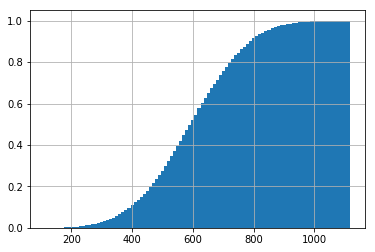

In [34]:
np.random.choice(range(240), size=5, replace=False, p=None)
sums_five_reps = []
for x in range(10000): # adding another zero makes this substantially slower
    sums_five_reps.append(sum(np.random.choice(range(240), size=5, replace=False, p=None)))
    
print(sorted(sums_five_reps)[0:100])
ser_five_reps = pd.Series(sorted(sums_five_reps))
# ser[0:50]
ser_five_reps.hist(cumulative=True, density=1, bins=100)
plt.show()

This approximate distribution produced by sampling seems about as smooth as the exact one above.  So we could take the rank sums from the team data and plug it into a set of distributions to pull out odds for each.  Alternatively, we could calculate the odds directly using a similar simulation to that above with each team, seeing how often a better or equal sum comes up. I want to play with that latter idea, partly because I can easily imagine turning it into a function, which is something I haven't done much of in Python yet

In [52]:
def odds_of_equal_or_better_ranks(rank_sum = 250, num_replicates = 5, pool_size = 240, reps = 10000):
    num_better_or_equal = 0
    for x in range(reps):
        if sum(np.random.choice(range(pool_size), size = num_replicates, replace=False, p=None)) <= rank_sum:
            num_better_or_equal += 1
#         num_better_or_equal = sum((np.random.choice(range(pool_size), size = num_replicates, replace=False, p=None))
    return num_better_or_equal

odds_list =[]
for i in range(10):
    odds_list.append(odds_of_equal_or_better_ranks())

print(odds_list)
print(np.mean(odds_list))
print(np.std(odds_list))
            

[86, 101, 90, 105, 96, 115, 100, 110, 101, 102]
100.6
8.15107354893


This is less satisfying than I'd hoped, but a good experiment nonetheless.  It takes a fair amount of time and gives variation of +/- 8%, which is not good.  I would expect that building a CDF and referencing that would give tighter results.  The speed would depend on how I search for the index 

<br>
# III. Network analysis of the league using graphs in NetworkX

In [ ]:
import networkx as nx

Let's generate a generic graph of the team matchups first, with edges representing a simple matchup.  Within the edge data, I'll store a "margin" which will be the sum of the margins of victory for matchups involving those teams.

In [ ]:
G = nx.Graph()
for team in all_team_combos:
    team_name = str(team[0] + "/" + team[1])
    G.add_node(team_name)
    
for key, value in team_dict.items():
    for game in value[3]:
        winning_team = game['Winner1'] + "/" + game['Winner2']
        losing_team = game["Loser1"] + '/' + game['Loser2']
        teams = [winning_team, losing_team]
        sorted_teams = sorted(teams)
        if(teams != sorted_teams): # adjust margin of victory to match team order produced by sorting
            margin = -(game['margin'])
        else:
            margin = game['margin']
        print(str(sorted_teams) + str(margin))
        if G.has_edge(sorted_teams[0], sorted_teams[1]): # add margins of victory for multiple matchups of the same team
            G[sorted_teams[0]][sorted_teams[1]]['margin'] += margin
        else:
            G.add_edge(sorted_teams[0], sorted_teams[1], margin=margin)

In [ ]:
nx.draw(G, with_labels = True)
plt.show()

Trying to determine which nodes have no edges, but the edge data are apparently only in the edges themselves. So I'm using the presence of a team_name in an edge to add an item to the team_dict entry for that team_name, specifically the word "game".  Then I'll use the size of the items list to determine which team_names were not involved in edges, make a list of those, then iterate through the list removing the corresponding nodes

In [ ]:
for edge in G.edges():
    team_dict[edge[0]].append('game')
    team_dict[edge[1]].append('game')

# removing nodes with no edges (e.g. all of Eric's nodes)
nodes_to_remove = []
for node in G.nodes():  # can't do the removal in here because it changes the iterated object
    if len(team_dict[node]) < 5:
        nodes_to_remove.append(node)   # make a list of unconnected nodes to remove     
for node in nodes_to_remove:
    G.remove_node(node)

nx.draw(G, with_labels = True)
plt.show()

Next I want to create a DIRECTED graph using the structure of the graph G above, but using the 'margin' data in the edges to determine the direction